In [1]:
from matplotlib import pyplot as plt
from PIL import Image

# <u> Experiments on the Learning Ability of RL Algorithms: </u>

In this notebook, we plot some graphs to check the learnability of the handover optimization problem. Our optimization goal is to maximize the throughput. Conventional handoff schemes can suffer from significantly bad throughput in a sufficiently dense network due to frequent handoffs. Handoffs disrupt the connection, and if it happens frequently enough, it can negate the gains obtained by stronger signal strength due to having a dense network (typically 5G networks). 

It is challenging to analyze the problem theoretically due to the random placement of cellular towers and random vehicle mobility. Based on *Stochastic Geometry* modeling of cellular networks, some works have shown that the average velocity and density of BS placements are the important determining factors in the rate of handoffs **[1.],[2.]**. Based on these, some works propose modified handoff algorithms. Most of these algorithms rely on increasing the throughput averaged over all possible BS placement configurations of particular placement density $\lambda$ **[3.],[4.]**. This brings us to the problem of optimizing such schemes if we are given a particular *BS configuration*, where we try to see what kind of practical learning algorithms one can implement with a good chance of success.

More formally, we can define the optimization problem in a discrete finite-horizon setting as follows ($u'$s denote UEs, $i'$s denote BSs)



\begin{align}
\begin{split} \label{opt}
&\mathbf{maximize}_{d^t_u} \quad \mathbb E_{mobility} \bigg(\sum_{u=0}^U \Big( \sum_{t=0}^{T} B^t_u \log_2 (1+SINR^t)  -d^t_uC_{HO} \Big) \bigg)  \\
&\mathbf{subject \; to } \quad 0 \leq c^t_i \leq C_i
\end{split}
\end{align}

where we denote the capacity of each base station $i$ (i.e., the number of users it can handle) to be $C_i$,$c^t_i$ the current number of UEs connected to a base station $i$ while $B^t_u$ and $SINR^t_u$ are the bandwidth, and the Signal to Noise ratio of a UE indexed by $u$. $C_{HO}$ is the cost of handoffs that, is the loss of throughput clumped into a single number while $d^t_u$ is the decision of doing a handoff to a different base station at time $t$ by a UE denoted by $u$. The decision variables here are $d^t_u$, i.e., the decision by a user to hand off or not. The expectation is with respect to the random mobility of the $UE$s.


Applying RL algorithms can be surprisingly difficult due to their high variability and high sample complexity **[5.]**. As a result, we take a step-by-step approach and try to solve a simplified version of the earlier optimization problem  given as follows,

\begin{align}
\begin{split} 
&\mathbf{maximize}_{d^t} \quad \mathbb E_{mobility} \bigg( \sum_{t=0}^{T} B \log_2 (1+SINR^t)  -d^tC_{HO}  \bigg)  \\
\end{split}
\end{align}

Since there is a single UE, we don't need to worry about capacity constraints, and the bandwidth $B$ can also be considered a constant.


For this, we have created a simplistic and Stochastic Geometry based model as the network environment where a UE moves. Further details on the environment can be found [`rbccps-iisc/theoretical_net_opt/lte_dense_single_ue.py`](https://github.com/rbccps-iisc/theoretical_net_opt/tree/main/network_simulations). Essentially its a Gym type framework which supports sequential decision making. 

The first step towards checking the performance of any learning-based algorithm is to try and overfit it to particular scenarios for various parameter initializations of the learning algorithm. We do exactly that
for the simplest case of:

 - No noise in the environment
 - No handover cost
 
Clearly, in such a situation, it is desirable to learn the handovers which give us the maximum possible signal strength, as there is no handover cost.


The RL learning algorithms we specifically focus on are:
 
  1. Policy Gradient-Based Algorithms (A2C, PPO, TRPO, REINFORCE).
  2. Value-based algorithms (DQN, DDQN, Double-DQN, etc). 

##  1. <u> A2C Algorithm: </u>

### 1. Experiment 1:

In the first experiment we simply try to check whether a RL algorithm can learn a handoff decision rule to optimize rewards. We don't add any handover cost and play the same seed repeatedly and thus in a certain sense overfitting the problem. We use a horizon length of 10000 steps. The A2C algorithm uses a simple dense neural network the details of which can be found in the `./experiments/Experiment1` folder.

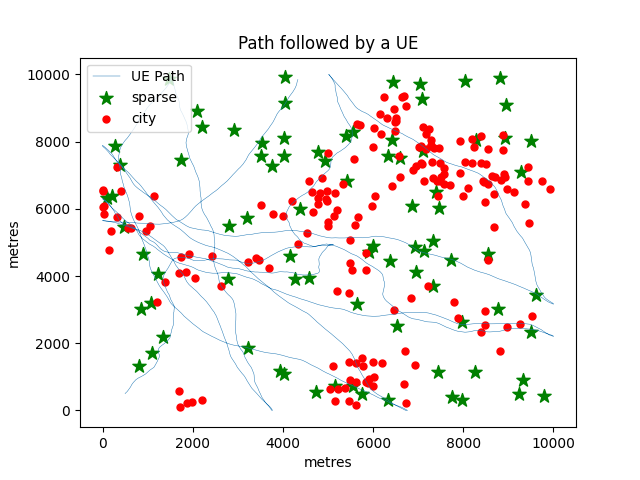

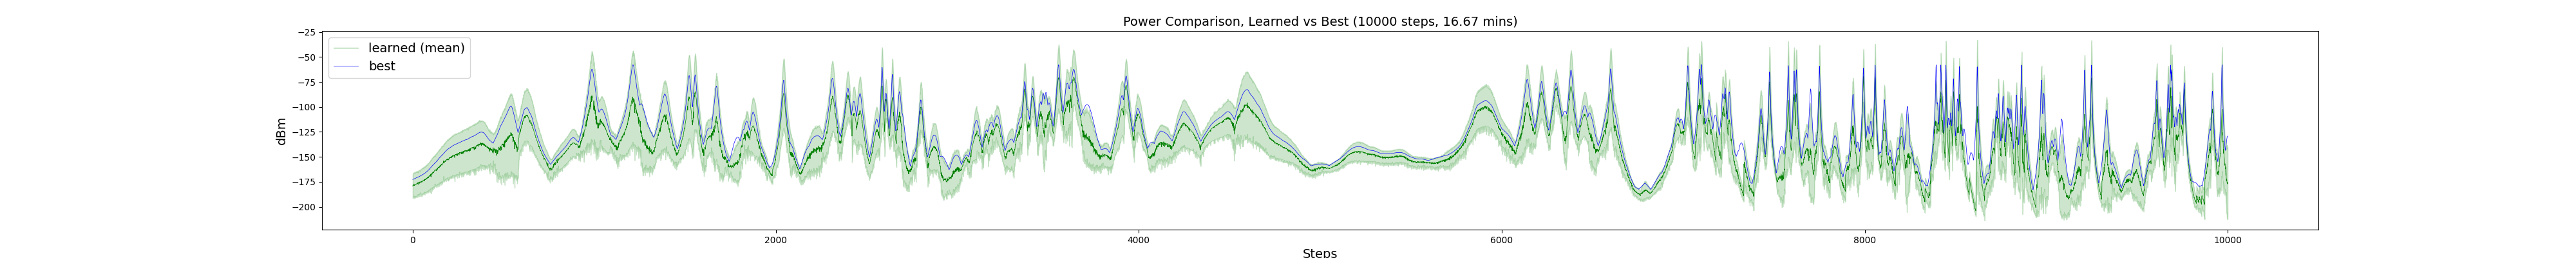

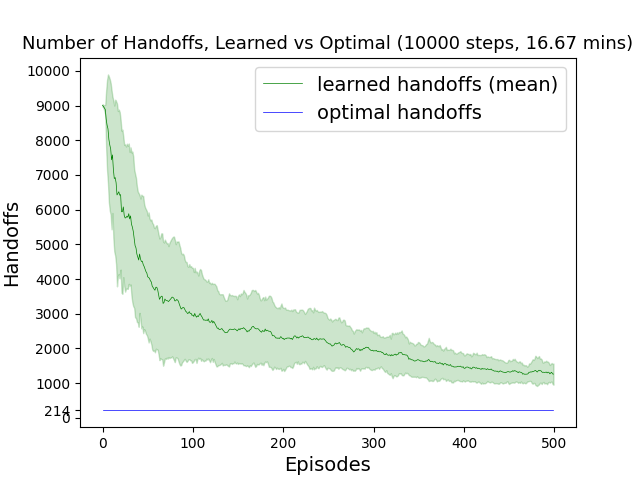

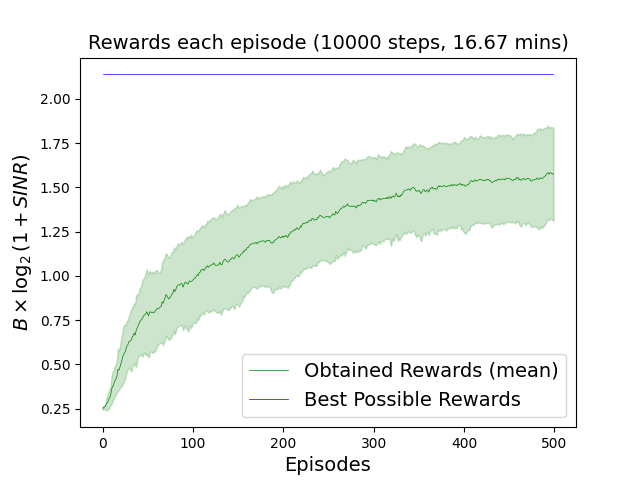

In [2]:
path = "./experiments/Experiment1/experiment_ue_path.png"
handoffs = "./experiments/Experiment1/experiment_handoffs.png"
sig_strength = "./experiments/Experiment1/experiment_signal_strengths.png"
rewards = "./experiments/Experiment1/experiment_rewards.png"

image = Image.open(path)
display(image)

image = Image.open(sig_strength)
display(image)

image = Image.open(handoffs)
display(image)

image = Image.open(rewards)
display(image)

### 2. Experiment 2:

In the second experiment we use the same setting as **Experiment 1** except now we simulate it for a horizon length of 5000 steps instead of 10000 steps as earlier.

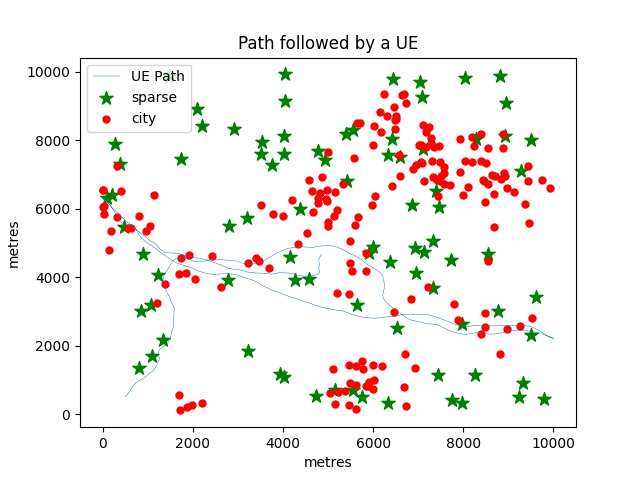

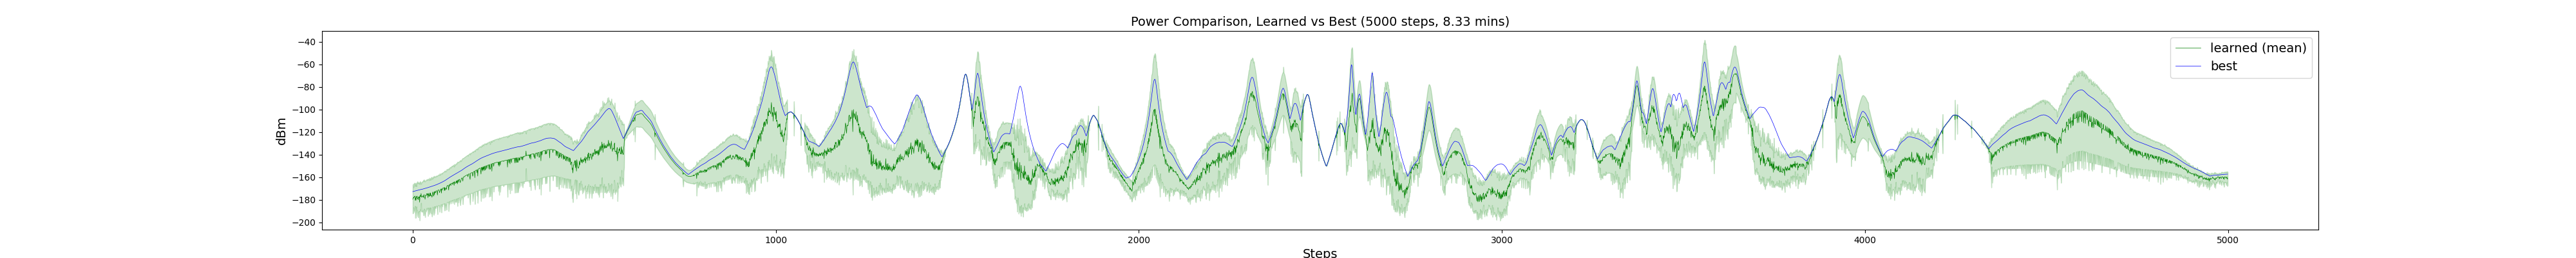

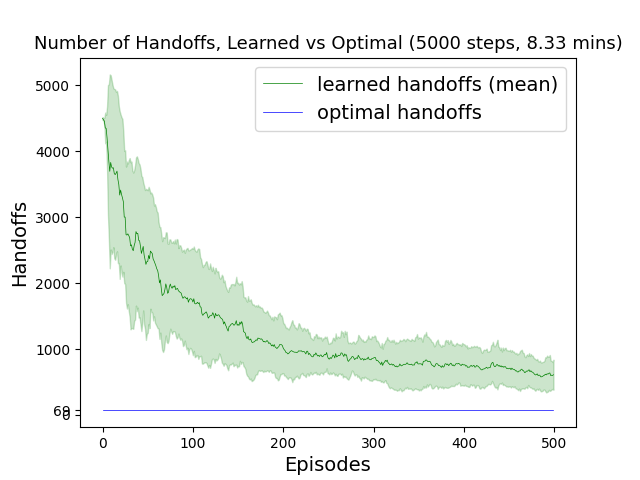

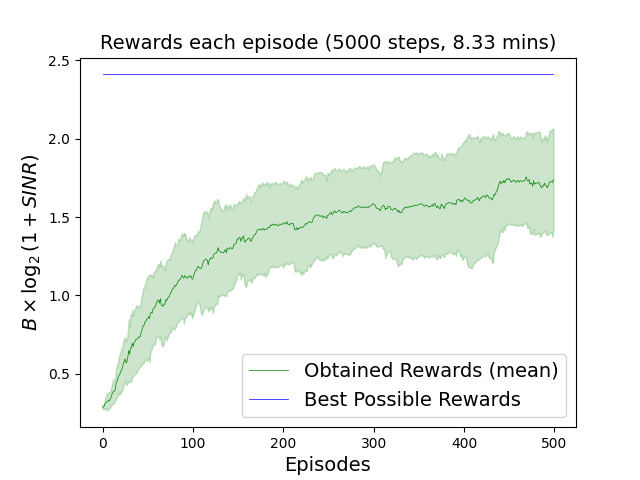

In [3]:
path = "./experiments/Experiment2/experiment_ue_path.png"
handoffs = "./experiments/Experiment2/experiment_handoffs.png"
sig_strength = "./experiments/Experiment2/experiment_signal_strengths.png"
rewards = "./experiments/Experiment2/experiment_rewards.png"

image = Image.open(path)
display(image)

image = Image.open(sig_strength)
display(image)

image = Image.open(handoffs)
display(image)

image = Image.open(rewards)
display(image)

### 3. <u>Comparison 1</u>:

Now we compare the normalized rewards and handoffs for simulating the optimization algorithm for 10000 steps vs for 5000 steps. The normalization is done by simply dividing the rewards by the max possible achievable rewards or minimum possible handoffs.

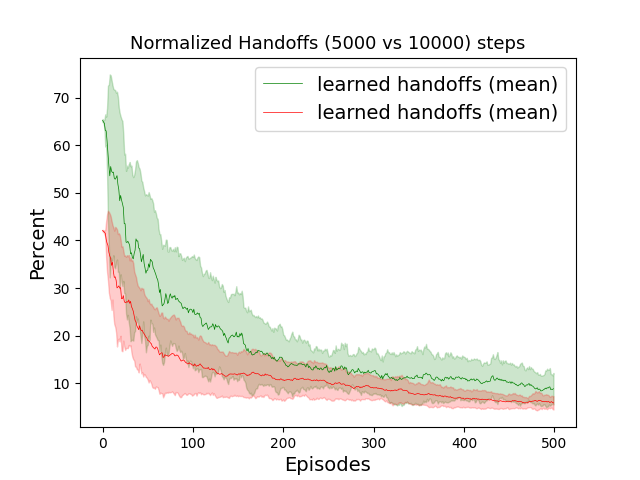

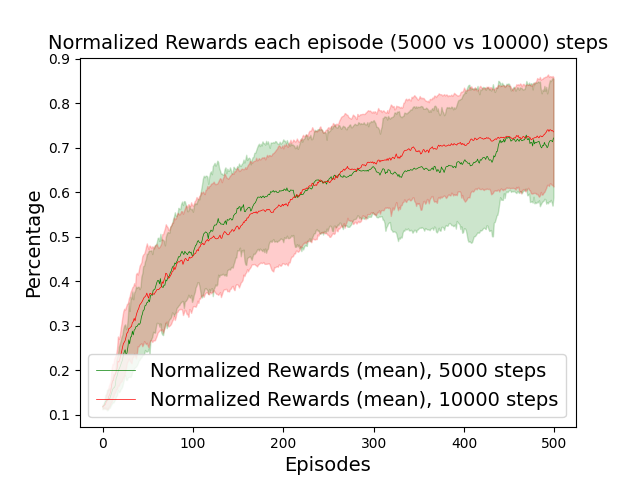

In [4]:
handoffs_comp = "./experiments/Comparison1/comparison_handoffs.png"
rewards_comp = "./experiments/Comparison1/comparison_rewards.png"

image = Image.open(handoffs_comp)
display(image)

image = Image.open(rewards_comp)
display(image)

### 4. <u> Experiment 3</u>:

In this experiment we test out the generalizability of the RL approach. We test this using the A2C algorithm as follows. We first fix a Base Station layout and then starting from $(500,500)$ we move in different directions as determined by a seed. We generate $50$ such seeds for training and $5$ seeds for testing. We train over $500$ training iterations and with $2500$ as horizon length. We average the results over different Neural Network initializations. At each initialization we alternate between training on $5$ randomly selected training seeds form the $50$ training seeds followed by testing over the $5$ test seeds. We plot the results using the performance on the test seeds. As usual this is a noiseless setting.

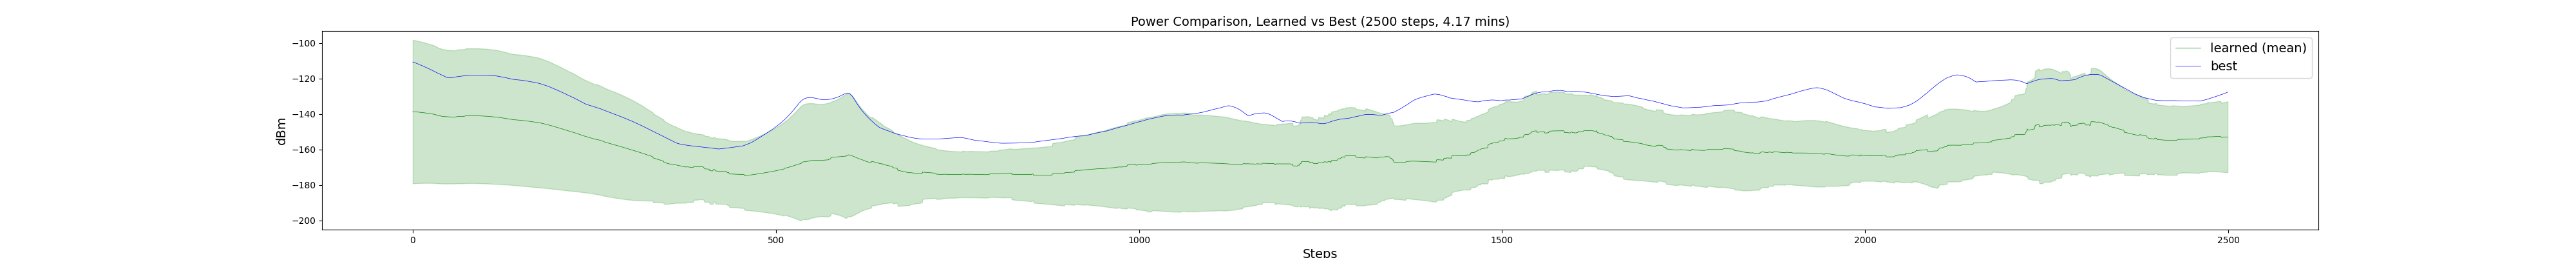

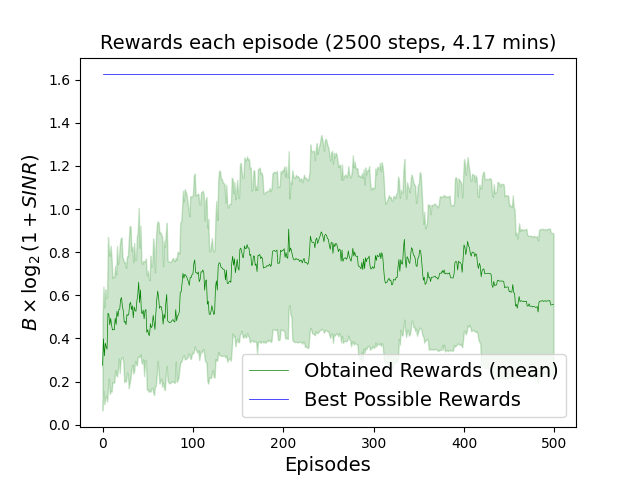

In [5]:
sig_strength = "./experiments/Experiment3/experiment_signal_strengths.png"
rewards = "./experiments/Experiment3/experiment_rewards.png"

image = Image.open(sig_strength)
display(image)

image = Image.open(rewards)
display(image)












# <u> References:</u>

**[1.]** Stochastic Geometry based Handover Probability Analysis in Dense Cellular Networks in *2018 10th International Conference on Wireless Communications and Signal Processing (WCSP)* by Teng, Yinglei and Liu, An and Lau, Vincent K. N.

**[2.]** Handoff Rate Analysis in Heterogeneous Wireless Networks with Poisson and Poisson Cluster Patterns in *MobiHoc '15, Association for Computing Machinery* by Bao, Wei and Liang, Ben

**[3.]** Handover management in dense cellular networks: A stochastic geometry approach in *2016 IEEE International Conference on Communications (ICC)* by Arshad, Rabe and ElSawy, Hesham and Sorour, Sameh and Al-Naffouri, Tareq Y. and Alouini, Mohamed-Slim

**[4.]** Velocity-Aware Handover Management in Two-Tier Cellular Networks in *Advances in IEEE Transactions on Wireless Communications, March 2017* by R. Arshad, H. ElSawy, S. Sorour, T. Y. Al-Naffouri and M.S. Alouini

**[5.]** Simple random search of static linear policies is competitive for reinforcement learning in *Advances in Neural Information Processing Systems 31 (NeurIPS 2018)* by Horia Mania, Aurelia Guy, Benjamin Recht